In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
gtd=pd.read_excel('/content/drive/MyDrive/globalterrorismdb_0919dist.xlsx')
gtd.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,Central America & Caribbean,National,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# Worldwide 

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
df=gtd
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df=df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
df['casualities']=df['Killed']+df['Wounded']
df.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0


# Time variation of attack frequency


Text(0, 0.5, 'Number of attacks')

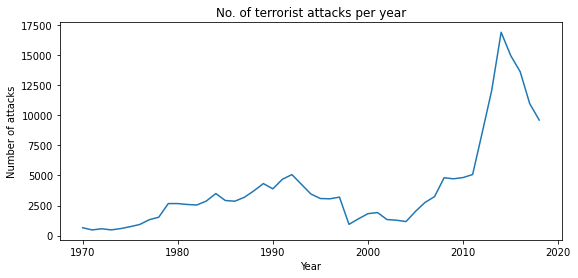

In [ ]:
# No. of terrorist attacks per year
Years=df['Year'].value_counts(sort=False)
fig,ax=plt.subplots(figsize=(9,4))
ax=sn.lineplot(x=Years.index,y=Years.values)
ax.set_title('No. of terrorist attacks per year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of attacks')

# Time variation of casuality frequecy

Text(0, 0.5, 'Casualities')

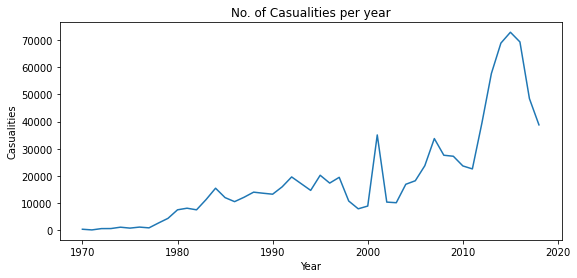

In [ ]:
# No. of casualities per year
X=df.groupby('Year',as_index=False).sum()
fig,ax=plt.subplots(figsize=(9,4))
ax=sn.lineplot(x=X['Year'],y=X['casualities'])
ax.set_title('No. of Casualities per year')
ax.set_xlabel('Year')
ax.set_ylabel('Casualities')

In [ ]:
# Variation of top 5 indices of a variable w.r.t number of attacks over time
def Time_Variation_of_attacks(Var):
  df2 = df[df[Var]!='Unknown']
  A = (df2[Var].value_counts()[:5]).index
  fig,ax=plt.subplots(figsize=(9,4))
  for i in A:
    df2=df[df[Var]==i]
    Years=df2['Year'].value_counts(sort=False)
    ax=sn.lineplot(x=Years.index,y=Years.values)
  ax.set_xlabel('Year')
  ax.set_ylabel('Number of attacks')
  ax.set_title('Time Variaton for top 5 '+str(Var)+' w.r.t number of attacks')
  ax.legend(A)

In [ ]:
# Variation of top 5 indices of a variable w.r.t number of casualities over time
def Time_Variation_of_casualities(Var):
  df2 = df[df[Var]!='Unknown']
  A=df2.groupby([Var],as_index=False).sum().sort_values(by='casualities',ascending=False).reset_index()[Var][:5]
  fig,ax=plt.subplots(figsize=(9,4))
  for i in A:
    df3=df2.groupby([Var,'Year'],as_index=False).sum()
    df4=df3[df3[Var]==i]
    ax=sn.lineplot(x=df4['Year'],y=df4['casualities'])
  ax.set_xlabel('Year')
  ax.set_ylabel('Number of Casualities')
  ax.set_title('Time Variaton for top 5 '+str(Var)+' w.r.t number of casualities')
  ax.legend(A)

# Top 5 regions prone to terror attack and damage

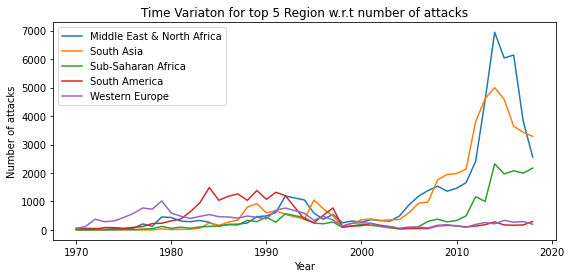

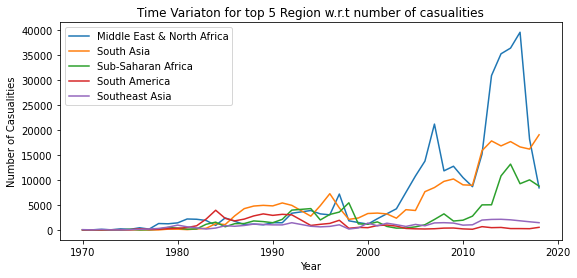

In [ ]:
Time_Variation_of_attacks('Region')
Time_Variation_of_casualities('Region')

# Top 5 countries prone to terror attacks and damage

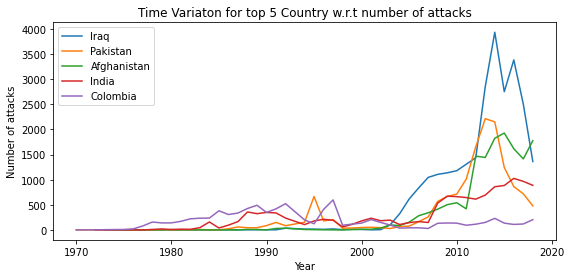

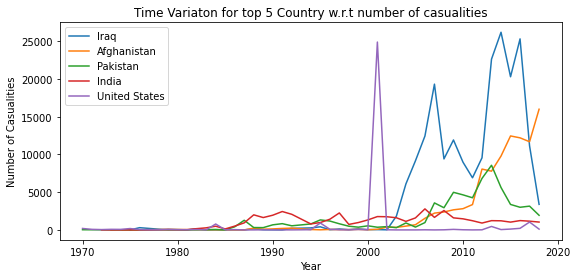

In [ ]:
Time_Variation_of_attacks('Country')
Time_Variation_of_casualities('Country')

# Top 5 cities prone to terror attack and damage

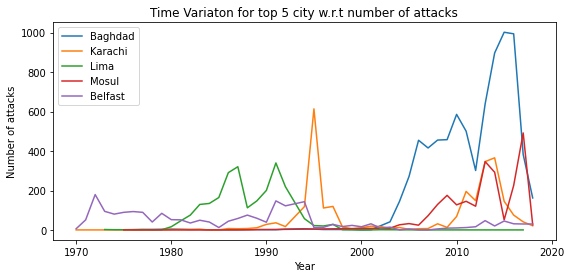

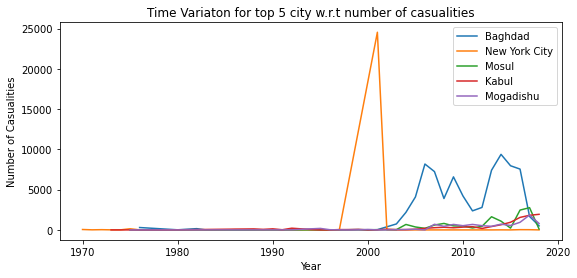

In [ ]:
Time_Variation_of_attacks('city')
Time_Variation_of_casualities('city')

# Top 5 terror groups

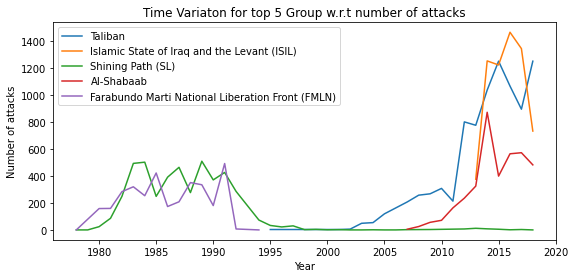

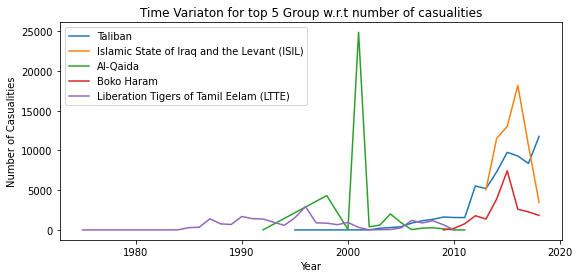

In [ ]:
Time_Variation_of_attacks('Group')  
Time_Variation_of_casualities('Group')  

# 5 most employed attack types

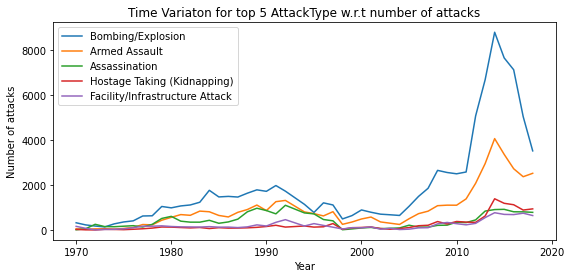

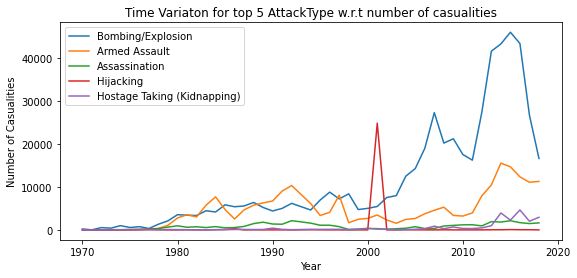

In [ ]:
Time_Variation_of_attacks('AttackType')
Time_Variation_of_casualities('AttackType')  

# Top 5 targets vulnerable to terrorism

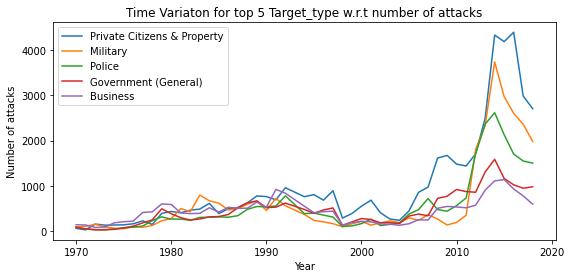

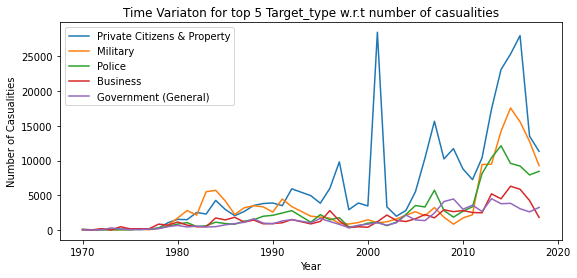

In [ ]:
Time_Variation_of_attacks('Target_type')
Time_Variation_of_casualities('Target_type')  

# Top 5 weapons used

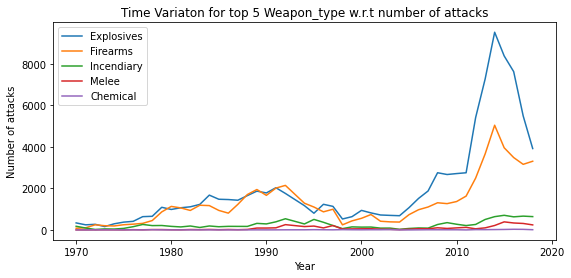

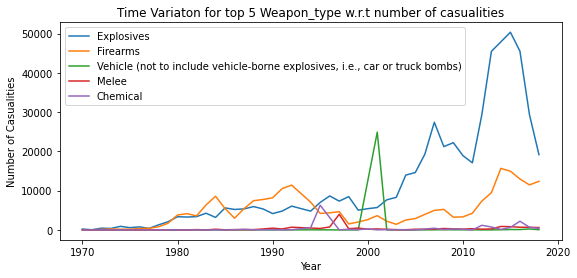

In [ ]:
Time_Variation_of_attacks('Weapon_type')
Time_Variation_of_casualities('Weapon_type')  

## India

In [ ]:
i_df = df[df['Country']=='India'].reset_index().drop(['index','Region','Country'],axis=1)
i_df.head()

,Year,Month,Day,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1972,2,22,New Delhi,28.585836,77.153336,Hijacking,0.0,0.0,B-747,NaN,Palestinians,Airports & Aircraft,Explosives,NaN,0.0
1,1975,1,2,Samastipur,25.863042,85.781004,Bombing/Explosion,4.0,0.0,Lalit Narayan Mishra and a legislator,"1/2/1975: The Indian Railway Minister, Lalit N...",Ananda Marga,Government (General),Explosives,Unknown,4.0
2,1976,5,26,New Delhi,28.585836,77.153336,Bombing/Explosion,0.0,0.0,New Delhi airport,NaN,Unknown,Airports & Aircraft,Explosives,NaN,0.0
3,1977,9,28,Bombay,19.075984,72.877656,Hijacking,0.0,0.0,DC-8,NaN,Japanese Red Army (JRA),Airports & Aircraft,Firearms,NaN,0.0
4,1979,1,13,Unknown,26.200605,92.937574,Armed Assault,NaN,NaN,patrol,NaN,Naga People,Police,Firearms,NaN,NaN


# Time variation of attack frequency in India

Text(0, 0.5, 'Number of attacks')

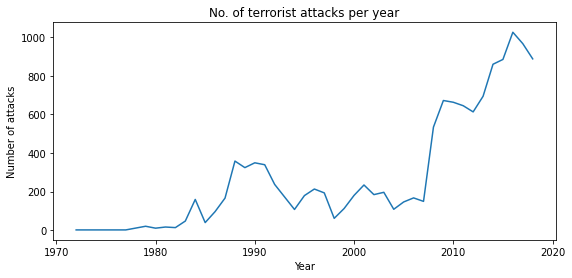

In [ ]:
# No. of terrorist attacks per year in India
Years=i_df['Year'].value_counts(sort=False)
fig,ax=plt.subplots(figsize=(9,4))
ax=sn.lineplot(x=Years.index,y=Years.values)
ax.set_title('No. of terrorist attacks per year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of attacks')

# Time variation of casuality frequecy in India

Text(0, 0.5, 'Casualities')

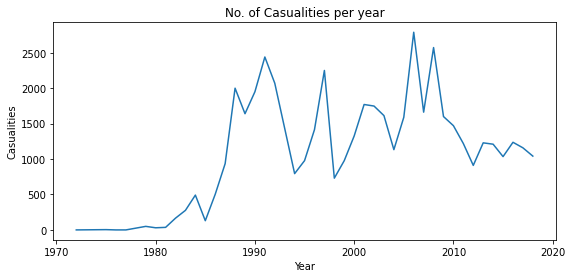

In [ ]:
# No. of casualities per year in India
X=i_df.groupby('Year',as_index=False).sum()
fig,ax=plt.subplots(figsize=(9,4))
ax=sn.lineplot(x=X['Year'],y=X['casualities'])
ax.set_title('No. of Casualities per year')
ax.set_xlabel('Year')
ax.set_ylabel('Casualities')

In [ ]:
# Variation of top 5 indices of a variable w.r.t number of attacks over time in India
def Indian_Time_Variation_of_attacks(Var):
  df2 = i_df[i_df[Var]!='Unknown']
  A = (df2[Var].value_counts()[:5]).index
  fig,ax=plt.subplots(figsize=(9,4))
  for i in A:
    df2=i_df[i_df[Var]==i]
    Years=df2['Year'].value_counts(sort=False)
    ax=sn.lineplot(x=Years.index,y=Years.values)
  ax.set_xlabel('Year')
  ax.set_ylabel('Number of attacks')
  ax.set_title('Time Variaton for top 5 '+str(Var)+' w.r.t number of attacks')
  ax.legend(A)

In [ ]:
# Variation of top 5 indices of a variable w.r.t number of casualities over time in India
def Indian_Time_Variation_of_casualities(Var):
  df2 = i_df[i_df[Var]!='Unknown']
  A=df2.groupby([Var],as_index=False).sum().sort_values(by='casualities',ascending=False).reset_index()[Var][:5]
  fig,ax=plt.subplots(figsize=(9,4))
  for i in A:
    df3=df2.groupby([Var,'Year'],as_index=False).sum()
    df4=df3[df3[Var]==i]
    ax=sn.lineplot(x=df4['Year'],y=df4['casualities'])
  ax.set_xlabel('Year')
  ax.set_ylabel('Number of Casualities')
  ax.set_title('Time Variaton for top 5 '+str(Var)+' w.r.t number of casualities')
  ax.legend(A)

# Top 5 cities prone to terror attack and damage in India

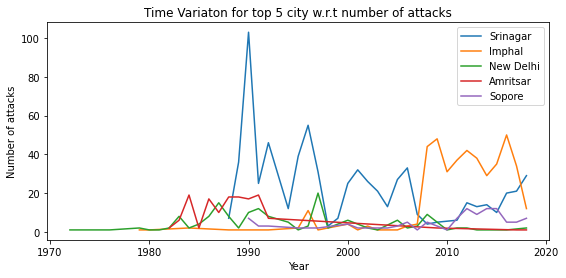

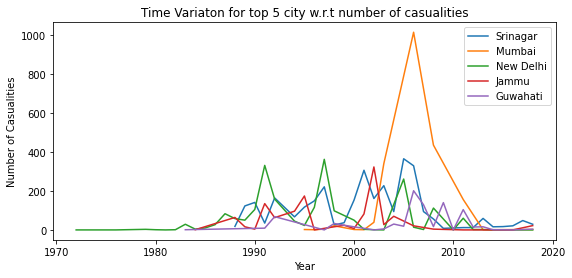

In [ ]:
Indian_Time_Variation_of_attacks('city')
Indian_Time_Variation_of_casualities('city')

# Top 5 terror groups operating in India

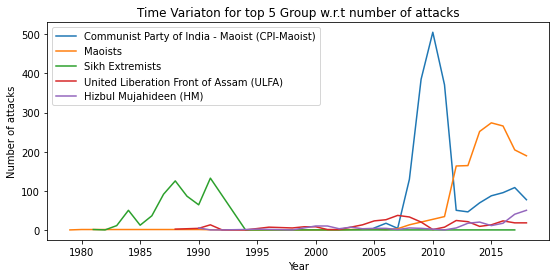

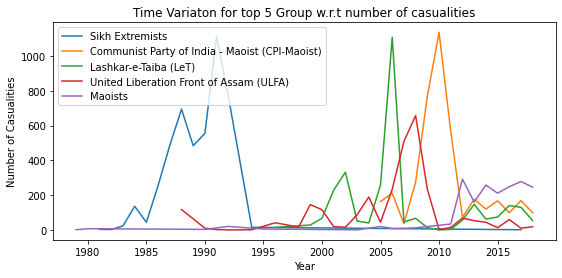

In [ ]:
Indian_Time_Variation_of_attacks('Group')  
Indian_Time_Variation_of_casualities('Group')  

# 5 most employed attack types in India

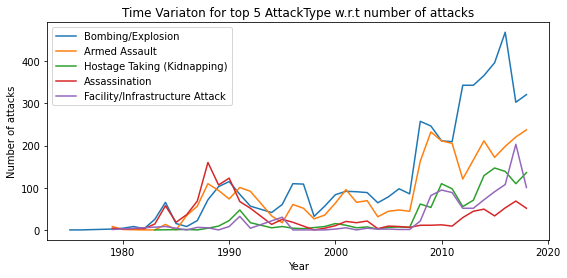

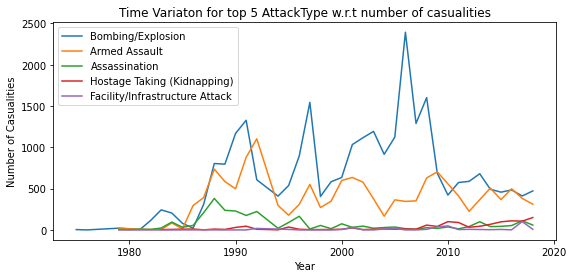

In [ ]:
Indian_Time_Variation_of_attacks('AttackType')
Indian_Time_Variation_of_casualities('AttackType')  

# Top 5 targets vulnerable to terrorism in India

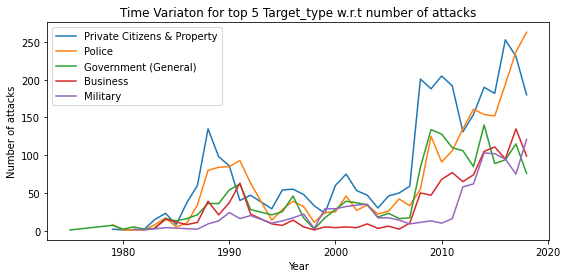

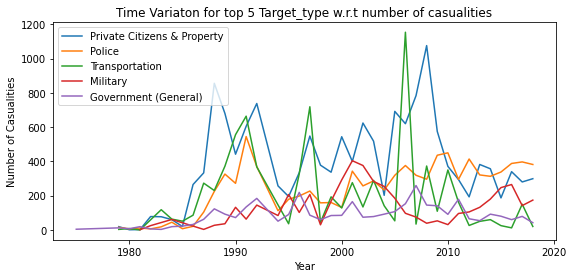

In [ ]:
Indian_Time_Variation_of_attacks('Target_type')
Indian_Time_Variation_of_casualities('Target_type')  

# Top 5 weapons used in India

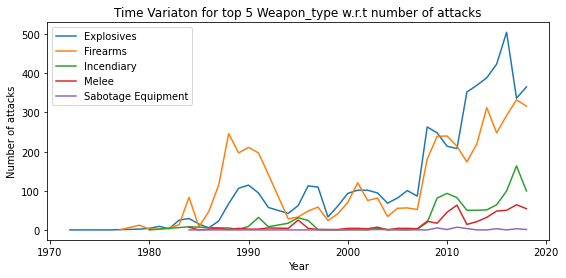

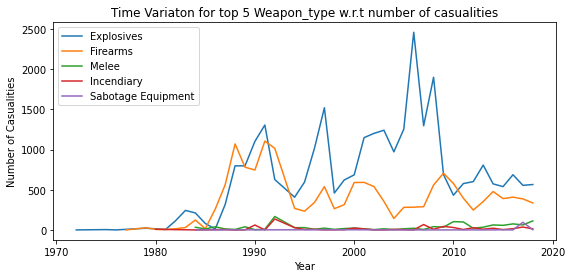

In [ ]:
Indian_Time_Variation_of_attacks('Weapon_type')
Indian_Time_Variation_of_casualities('Weapon_type') 

# Predicting whether an attack in India will be successful or not 

In [ ]:
from sklearn import tree
from sklearn.externals.six import StringIO  
from sklearn.ensemble import RandomForestClassifier
data = gtd[gtd['Country']=='India'].reset_index().drop(['index','Region','Country'],axis=1)
data.head()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


,eventid,Year,Month,Day,approxdate,extended,resolution,country,region,provstate,city,latitude,longitude,specificity,vicinity,location,Summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,AttackType,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,Target_type,targsubtype1,targsubtype1_txt,corp1,Target,natlty1,natlty1_txt,...,weapsubtype4,weapsubtype4_txt,weapdetail,Killed,nkillus,nkillter,Wounded,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197202220004,1972,2,22,NaN,0,NaT,92,6,Delhi,New Delhi,28.585836,77.153336,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,4,Hijacking,NaN,NaN,NaN,NaN,6,Airports & Aircraft,42.0,Aircraft (not at an airport),Lufthansa,B-747,75.0,Germany,...,NaN,NaN,Explosives,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,1.0,187.0,0.0,NaN,NaN,Yemen,Yemen,1.0,5000000.0,NaN,NaN,NaN,NaN,2.0,Hostage(s) released by perpetrators,187.0,NaN,NaN,NaN,NaN,Hijacking DB,1,1,1,1,NaN
1,197501190004,1975,1,2,NaN,0,NaT,92,6,Bihar,Samastipur,25.863042,85.781004,1.0,0,The attack occurred in the town,"1/2/1975: The Indian Railway Minister, Lalit N...",1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,2,Government (General),18.0,"Government Personnel (excluding police, military)",Railway Minister of India and legislator,Lalit Narayan Mishra and a legislator,92.0,India,...,NaN,NaN,No additional information available.,4.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The case is very unclear and there are many ru...,"""Leaders of India Irate at Killing: Death of A...","Dhananjay Mahapatra, ""SC: Why has LN Mishra mu...",NaN,UMD Encyclopedia of World Terrorism 2012,0,0,0,0,NaN
2,197605260001,1976,5,26,NaN,0,NaT,92,6,Delhi,New Delhi,28.585836,77.153336,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,6,Airports & Aircraft,44.0,Airport,NaN,New Delhi airport,92.0,India,...,NaN,NaN,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
3,197709280004,1977,9,28,NaN,0,NaT,92,6,Maharashtra,Bombay,19.075984,72.877656,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,4,Hijacking,NaN,NaN,NaN,NaN,6,Airports & Aircraft,42.0,Aircraft (not at an airport),Japan Airlines,DC-8,101.0,Japan,...,NaN,NaN,Firearm; Grenades,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,1.0,146.0,9.0,NaN,NaN,Algeria,Algeria,1.0,6000000.0,NaN,NaN,NaN,NaN,2.0,Hostage(s) released by perpetrators,NaN,NaN,NaN,NaN,NaN,Hijacking DB,1,1,1,1,NaN
4,197901130004,1979,1,13,NaN,0,NaT,92,6,Assam,Unknown,26.200605,92.937574,4.0,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,3,Police,23.0,Police Patrol (including vehicles and convoys),Police,patrol,92.0,India,...,NaN,NaN,Automatic firearm,NaN,NaN,NaN,NaN,NaN,NaN,1,4.0,Unknown,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN


In [ ]:
features = [ 'Month','Day','latitude','longitude','attacktype1','targtype1','weaptype1']
features_target=data[features]
features_target['casualities']=data['Killed']+data['Wounded']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
features_target.isnull().any()

Month          False
Day            False
latitude        True
longitude       True
attacktype1    False
targtype1      False
weaptype1      False
casualities     True
dtype: bool

In [ ]:
features_target['casualities'].fillna(0.0,inplace=True)
features_target['latitude'].fillna(features_target['latitude'].mean(), inplace=True)
features_target['longitude'].fillna(features_target['longitude'].mean(), inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
X=features_target
Y=data['success']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

In [ ]:
X_train.isnull().any()

Month          False
Day            False
latitude       False
longitude      False
attacktype1    False
targtype1      False
weaptype1      False
casualities    False
dtype: bool

In [ ]:
dtc = tree.DecisionTreeClassifier(max_depth=3) 
dtc = dtc.fit(X_train,Y_train)

In [ ]:
dtc_pred = dtc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,dtc_pred))

              precision    recall  f1-score   support

           0       0.72      0.25      0.37       399
           1       0.88      0.98      0.93      2172

    accuracy                           0.87      2571
   macro avg       0.80      0.61      0.65      2571
weighted avg       0.85      0.87      0.84      2571



In [ ]:
rfc = RandomForestClassifier(n_estimators=500) 
rfc = rfc.fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


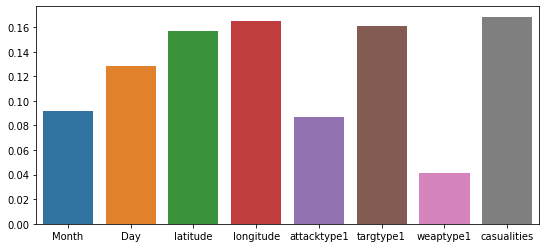

In [ ]:
N=[]
S=[]
for name, score in zip(X_train, rfc.feature_importances_):
    N.append(name)
    S.append(score)
fig,ax=plt.subplots(figsize=(9,4))
ax = sn.barplot(N,S)

In [ ]:
succeed_or_fail = RandomForestClassifier(n_estimators=100) 
succeed_or_fail = rfc.fit(X, Y) #clf

month = 3          # in which month would the attack take place
day = 4             # on which day of the month would the attack take place
latitude = 28.7041  
longitude = 77.1025 
attackType = 3       # 9 categories
targetType = 2       # 22 categories
weaponType = 3       # 13 categories
casualities = 43     # no. of casualities in an attack

outcome = (succeed_or_fail.predict([[(month),(day),(latitude),(longitude),(attackType),(targetType),(weaponType),(casualities)]])) 
if outcome == 1:
  print('The attack will be successful')
else:
  print('The attack would not be successful')

The attack will be successful
